

 **IMPORTING LIBRARIES**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import warnings

warnings.filterwarnings("ignore")

**IMPORTING DATASETS**

In [ ]:
train=pd.read_csv("/content/train_data.txt",delimiter=':::',header=None)
test=pd.read_csv("/content/test_data.txt",delimiter=':::',header=None)
test_solution=pd.read_csv("/content/test_data_solution.txt",delimiter=':::',header=None)

In [ ]:
print("shape",train.shape)
train.head()

shape (54214, 4)


0                                   1           2  \
0  1       Oscar et la dame rose (2009)       drama    
1  2                       Cupid (1997)    thriller    
2  3   Young, Wild and Wonderful (1980)       adult    
3  4              The Secret Sin (1915)       drama    
4  5             The Unrecovered (2007)       drama    

                                                   3  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [ ]:
print("shape",test.shape)
test.head()

shape (54200, 3)


0                              1  \
0  1          Edgar's Lunch (1998)    
1  2      La guerra de papá (1977)    
2  3   Off the Beaten Track (2010)    
3  4        Meu Amigo Hindu (2015)    
4  5             Er nu zhai (1955)    

                                                   2  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [ ]:
print("shape",test_solution.shape)
test_solution.head()

shape (54200, 4)


0                              1              2  \
0  1          Edgar's Lunch (1998)       thriller    
1  2      La guerra de papá (1977)         comedy    
2  3   Off the Beaten Track (2010)    documentary    
3  4        Meu Amigo Hindu (2015)          drama    
4  5             Er nu zhai (1955)          drama    

                                                   3  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [ ]:
df = pd.concat((train ,test_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [ ]:
df.shape

(108414, 4)

In [ ]:
df.duplicated().sum()

df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()

df.dropna( inplace = True )

In [ ]:
df.shape

(108414, 4)

**DATA PREPROCESSING**

In [ ]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)

    text = text.split()

    text = [word for word in text if word not in stopword]


    return " ".join(text)

In [ ]:
df["Clean_Description"] =  df["Description"].apply(preprocessing)

In [ ]:
df.head()

id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   Clean_Description  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [ ]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

**VISUALIZATION**

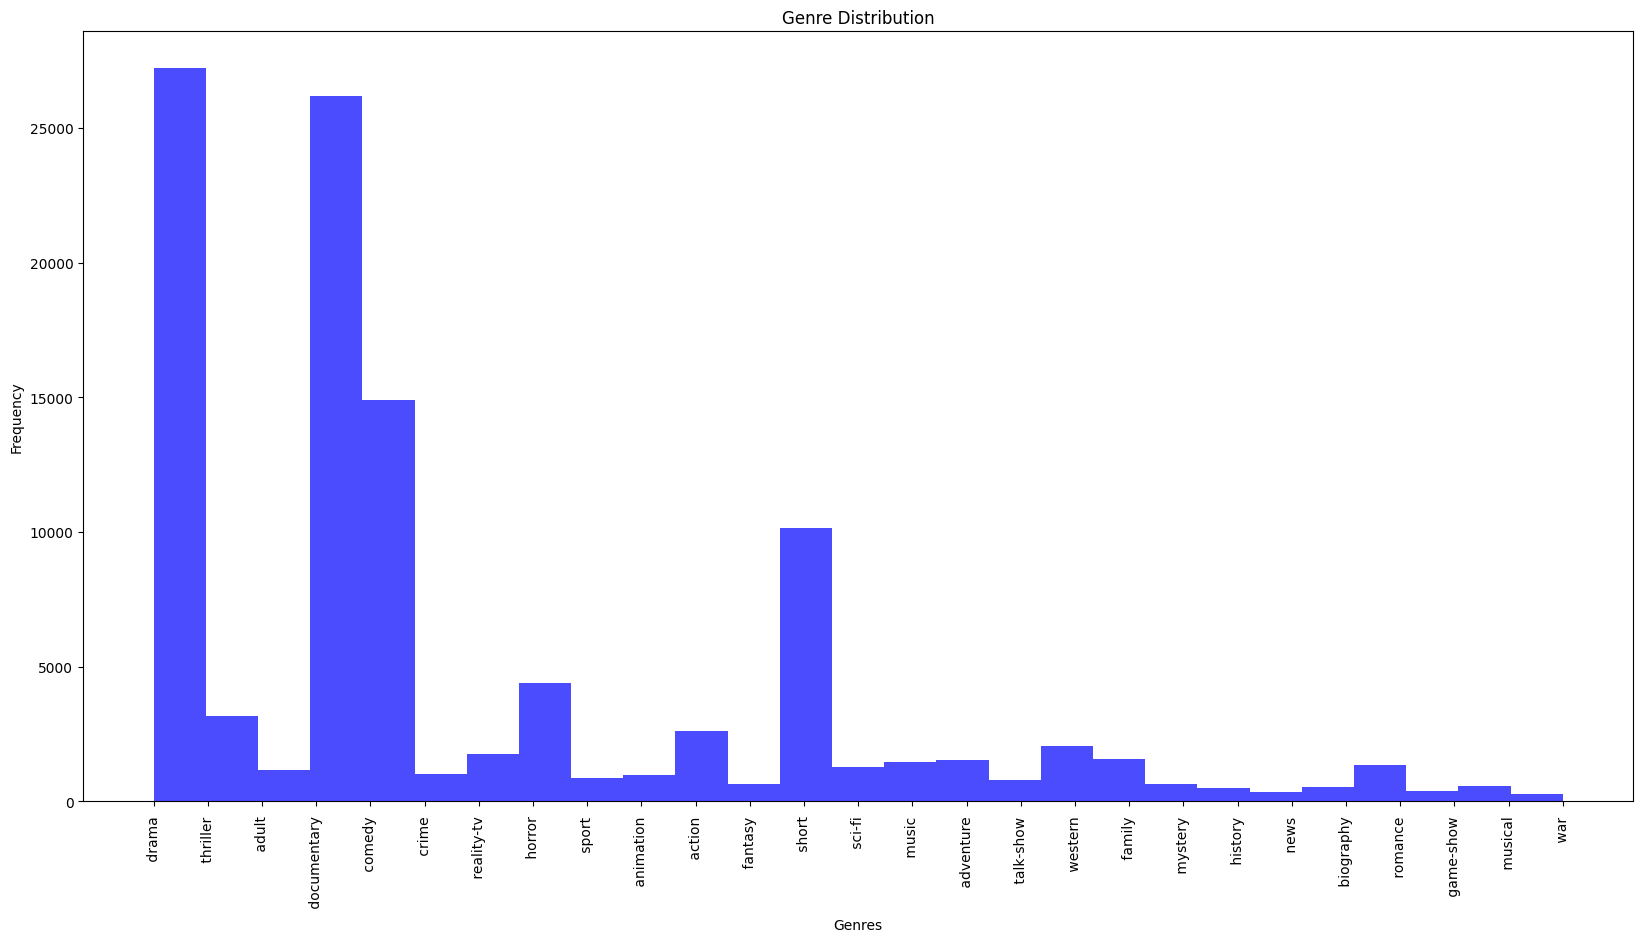

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

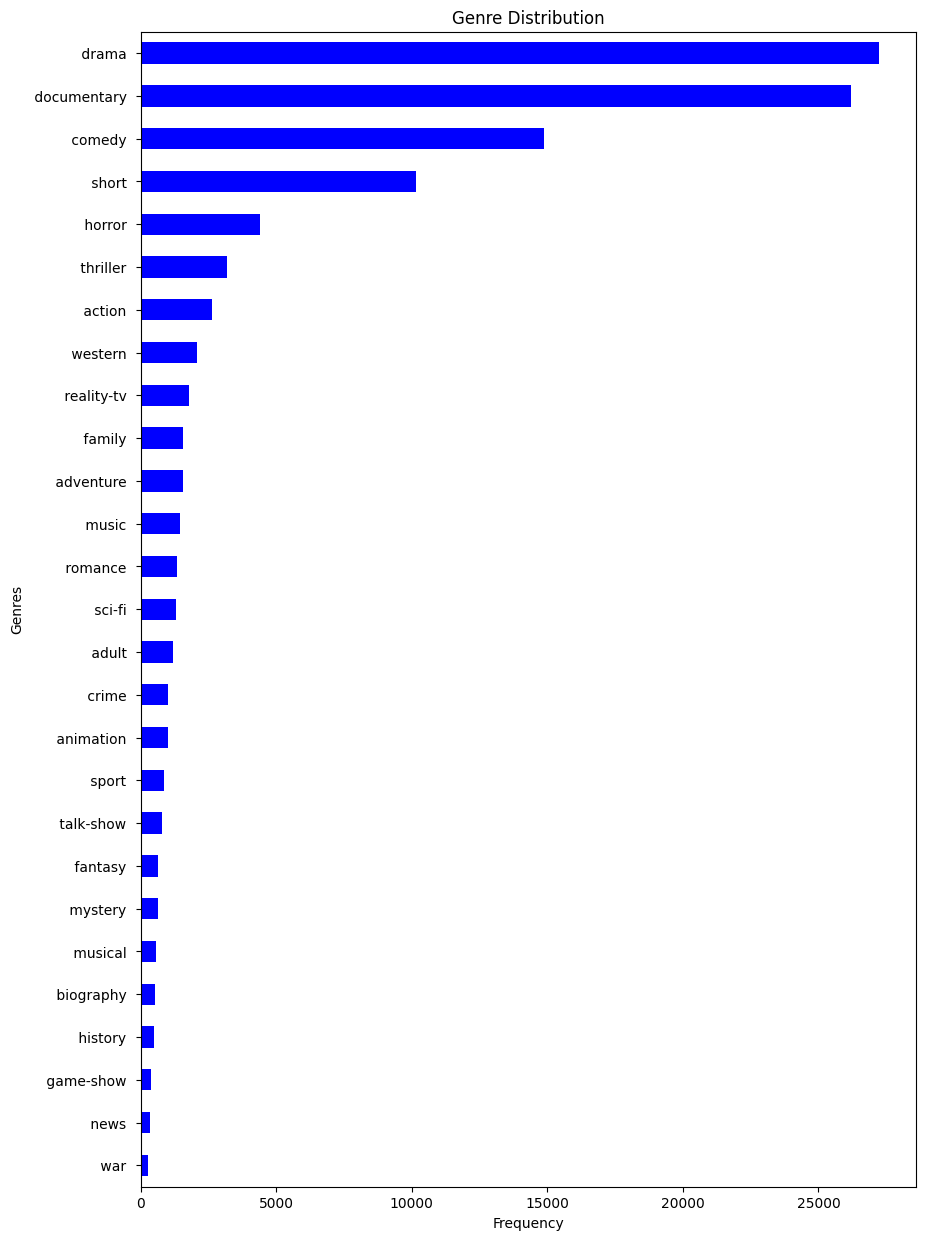

In [ ]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

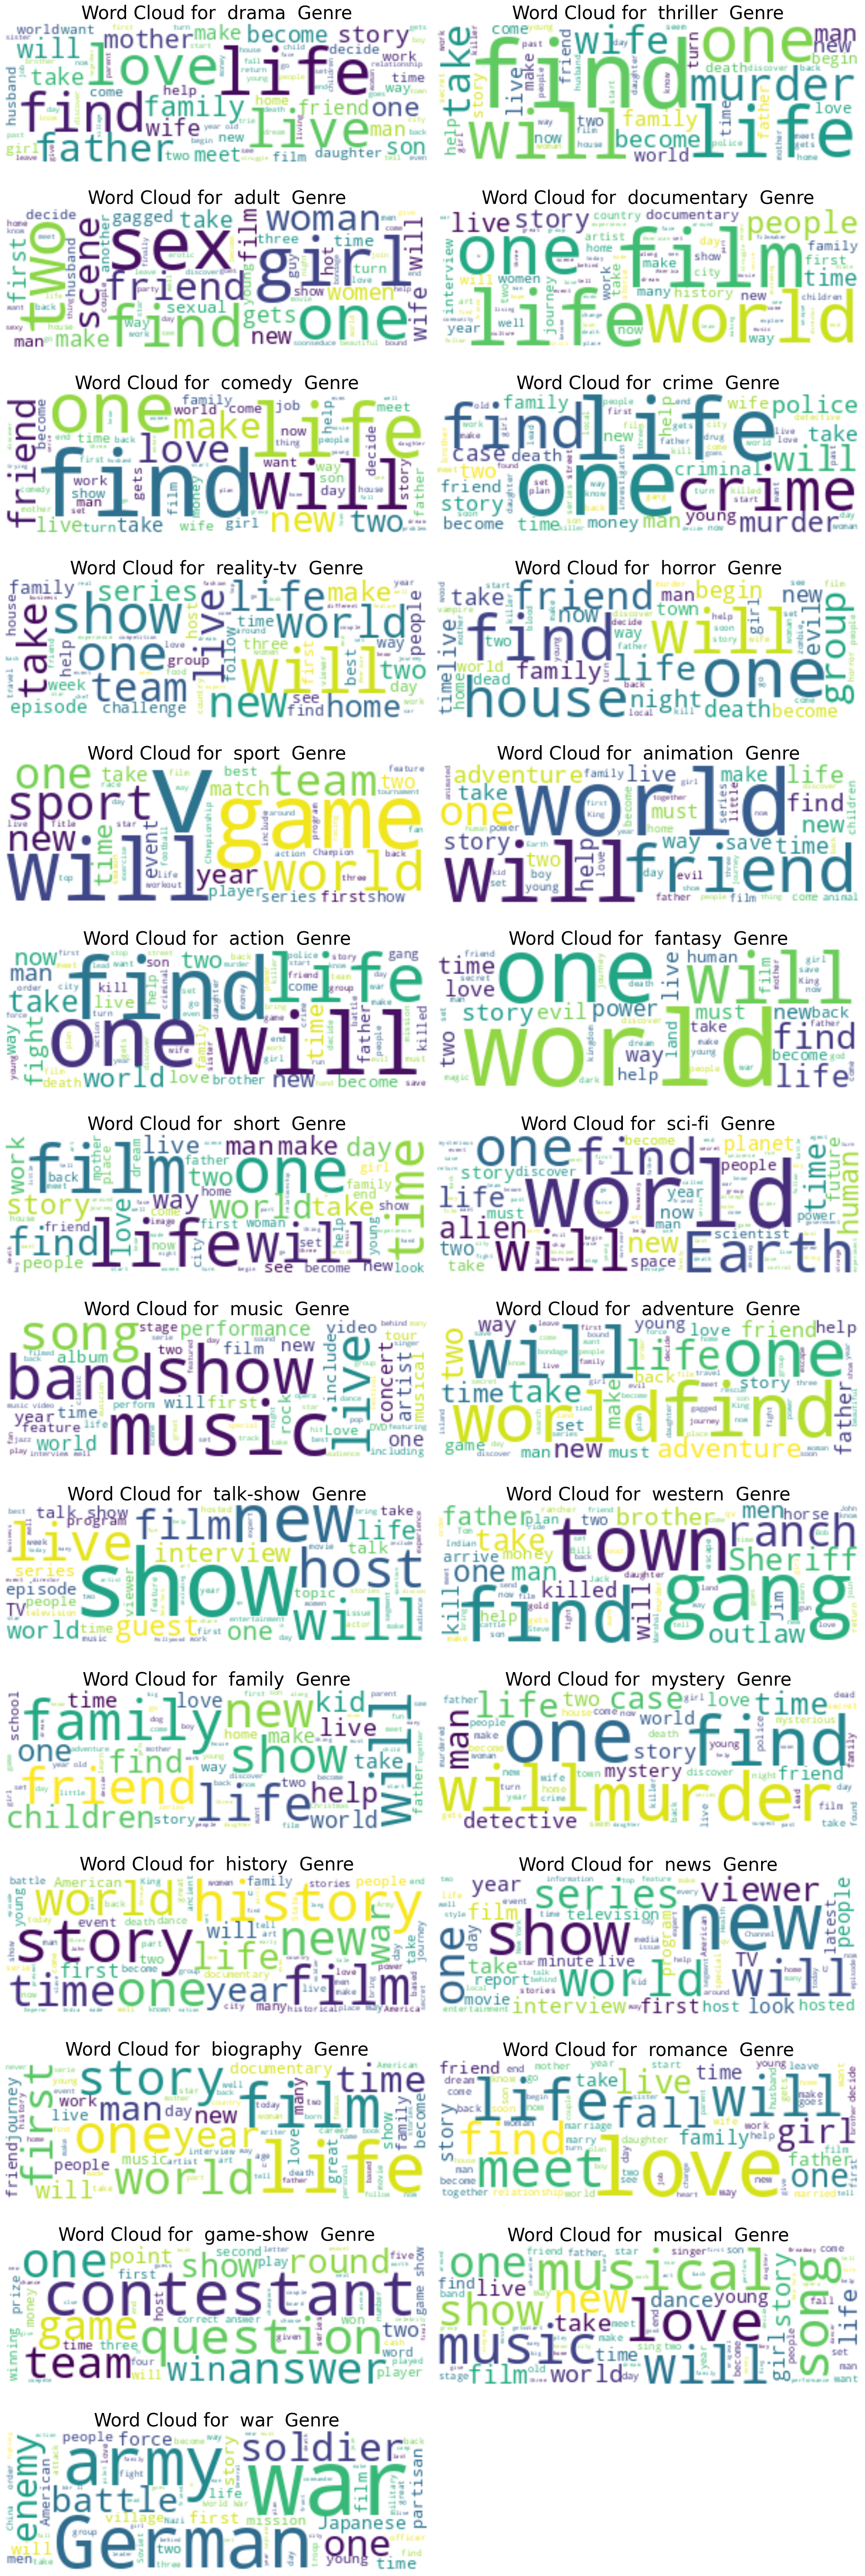

In [ ]:
genres = df['Genre'].unique()
plt.figure(figsize=(20, 60))
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)
    text_subset = " ".join(list(df[df["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')


plt.tight_layout()
plt.show()

In [ ]:
data = df.drop(["Title","id"] , axis = 1) # will drop column
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                   Clean_Description  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

**MODEL SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                   Clean_Description  Genre_encoded  
0  listening conversation doctor parents 10yearol...              8  
1  brother sister past incestuous relationship cu...             24  
2  bus empties students field trip museum natural...              1  
3  help unemployed father make ends meet edith tw...              8  
4  films title refers unrecovered bodies ground z...              8

In [ ]:
## Split the data
x = data["Clean_Description"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3)

In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.9900907904966464
Model Score on Testing data 0.576141429669485
               precision    recall  f1-score   support

      action        0.34      0.43      0.38       648
       adult        0.38      0.57      0.46       242
   adventure        0.26      0.46      0.33       279
   animation        0.16      0.37      0.22       126
   biography        0.01      0.04      0.01        25
      comedy        0.59      0.54      0.56      4715
       crime        0.10      0.20      0.14       158
 documentary        0.79      0.71      0.74      8675
       drama        0.70      0.58      0.63      9950
      family        0.18      0.31      0.23       267
     fantasy        0.11      0.22      0.15        95
   game-show        0.60      0.85      0.70        78
     history        0.03      0.22      0.05        23
      horror        0.60      0.64      0.62      1274
       music        0.52      0.60      0.55       368
     musical        0.09 

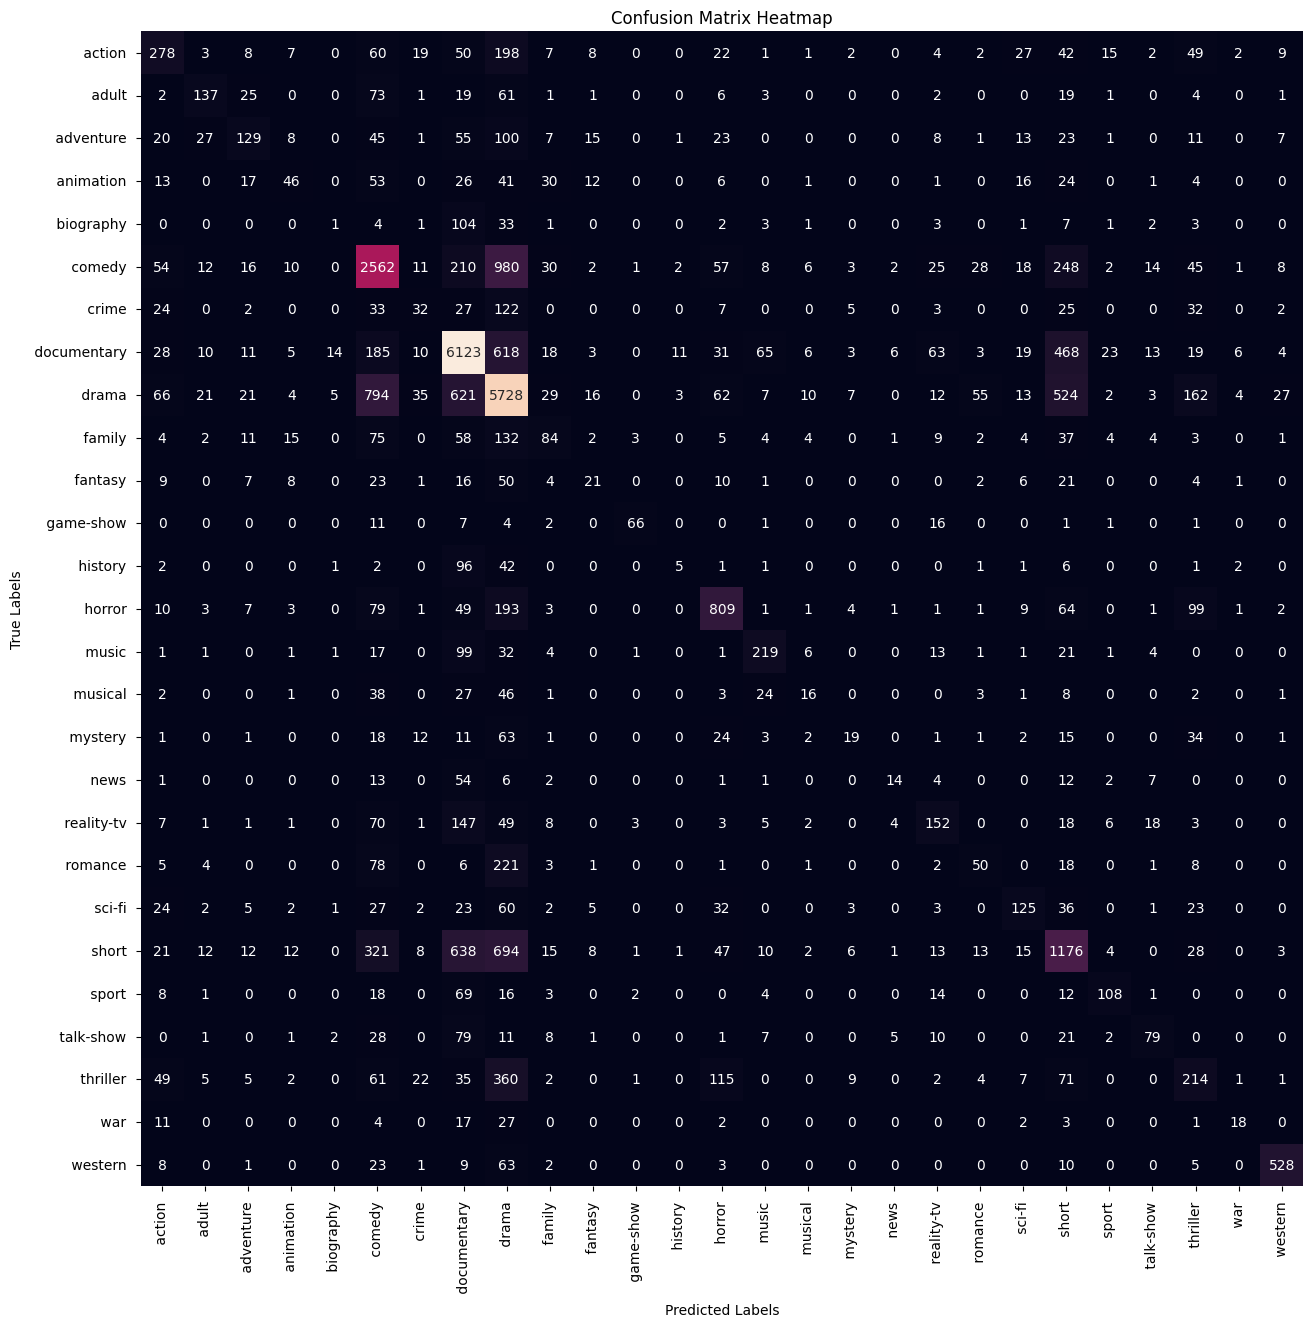

In [ ]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.9900907904966464
Model Score on Testing data 0.576141429669485
               precision    recall  f1-score   support

      action        0.34      0.43      0.38       648
       adult        0.38      0.57      0.46       242
   adventure        0.26      0.46      0.33       279
   animation        0.16      0.37      0.22       126
   biography        0.01      0.04      0.01        25
      comedy        0.59      0.54      0.56      4715
       crime        0.10      0.20      0.14       158
 documentary        0.79      0.71      0.74      8675
       drama        0.70      0.58      0.63      9950
      family        0.18      0.31      0.23       267
     fantasy        0.11      0.22      0.15        95
   game-show        0.60      0.85      0.70        78
     history        0.03      0.22      0.05        23
      horror        0.60      0.64      0.62      1274
       music        0.52      0.60      0.55       368
     musical        0.09 

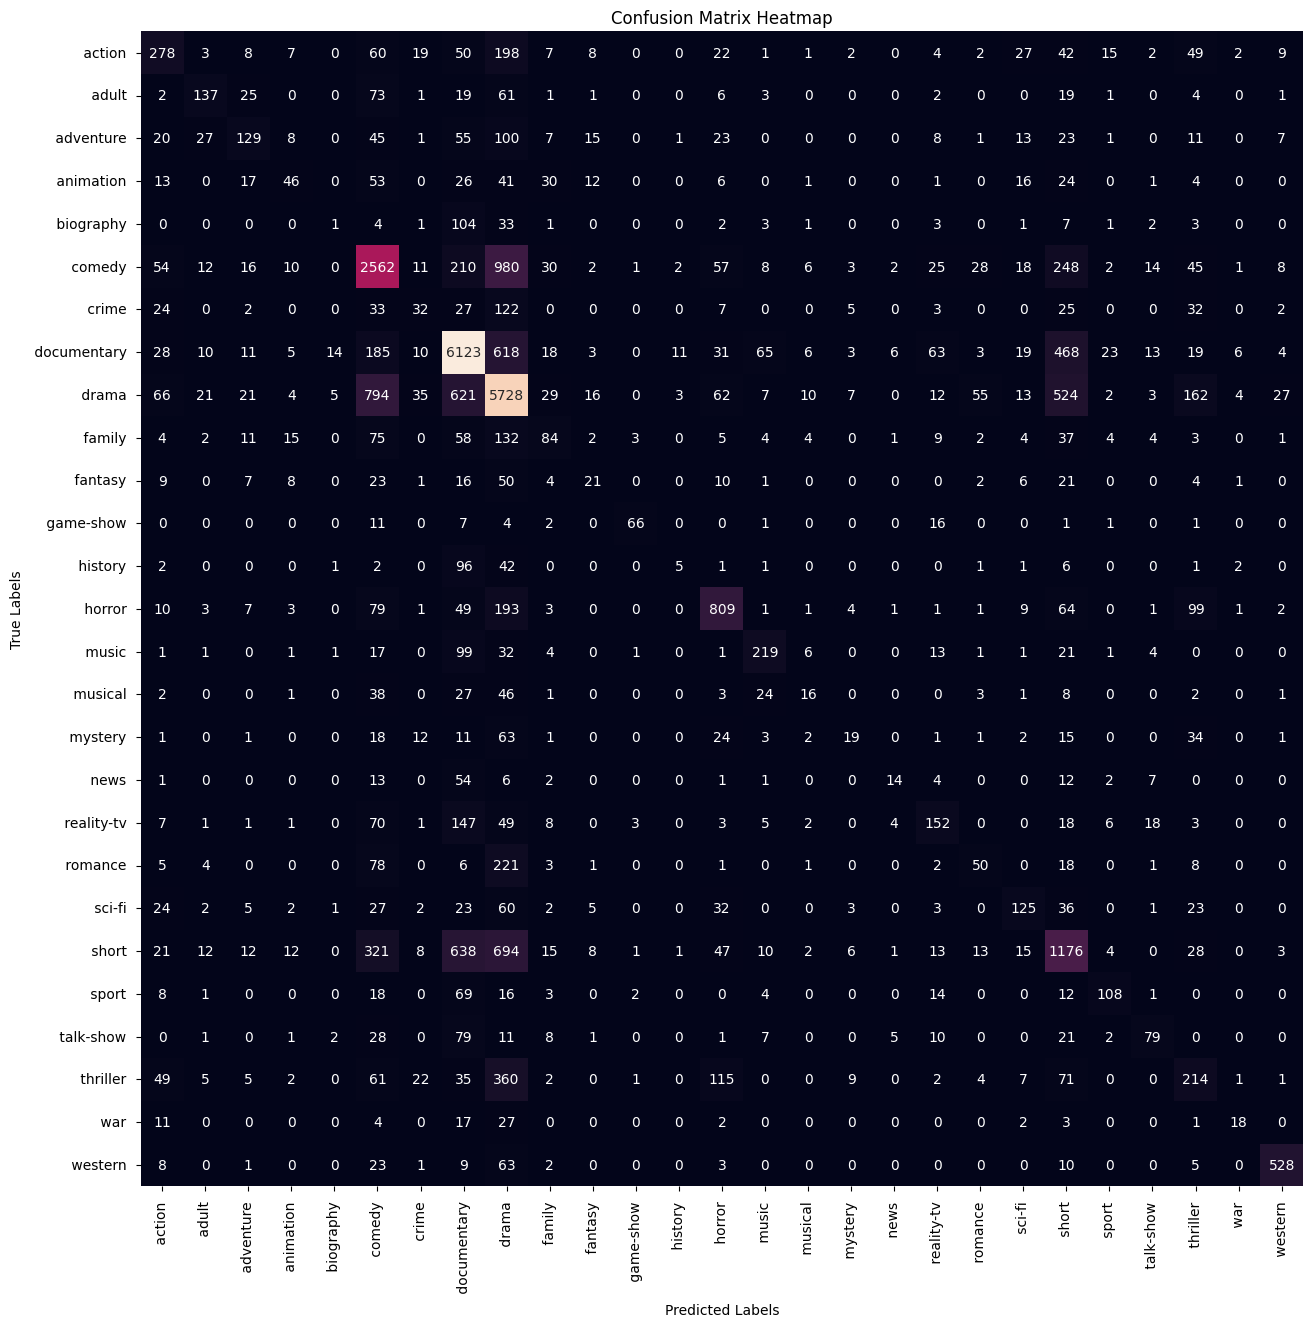

In [ ]:
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Testing data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()